Why keras?

Why RNN & LSTM? 블로그 포스트들과 우리 연구와의 관련성

* http://karpathy.github.io/2015/05/21/rnn-effectiveness/
    * Sequences input -> Positive or negative output도 처리 가능
    * 예제: Minimal character level RNN language model in python/numpy:
    https://gist.github.com/karpathy/d4dee566867f8291f086
* http://colah.github.io/posts/2015-08-Understanding-LSTMs/


In [42]:
import pandas as pd
import pickle

In [379]:
placeNum = str(786)
# statistical_picklePath2 = "../code/data/"+placeNum+"/"+placeNum+"_mpframe3.p"
statistical_picklePath2 = "../data/"+placeNum+"/"+placeNum+"_trajs_combined_balanced.p"
df = pd.read_pickle(statistical_picklePath2)

In [466]:
df2 = df[['traj', 'ts', 'dwell_time', 'time_start', 'ts_end', 'revisit_intention']]  #  'time_end',

In [467]:
df2.head(5)

,traj,ts,dwell_time,time_start,ts_end,revisit_intention
16767_25e9517c47319ab64486403f94348dd6,"[out, in, 2f, 2f-inner, 1f]","[1448711070, 1448711259, 1448711286, 144871128...","[314, 125, 98, 98, 65]","[20:44:30, 20:47:39, 20:48:06, 20:48:06, 20:48...","[1448711384, 1448711384, 1448711384, 144871138...",0.0
16955_53f0a6276486cc80405cf534d913fcbb,"[out, in, 1f, 1f-right, 1f-left]","[1464939171, 1464939171, 1464939171, 146493923...","[266, 263, 263, 198, 156]","[16:32:51, 16:32:51, 16:32:51, 16:33:54, 16:33...","[1464939437, 1464939434, 1464939434, 146493943...",0.0
16734_5b37d580c76a8c8c245cad3418349acb,"[out, in, 1f]","[1445856050, 1445856052, 1445856052]","[662, 527, 527]","[19:40:50, 19:40:52, 19:40:52]","[1445856712, 1445856579, 1445856579]",0.0
16736_70968e4fb8894b74997f6f4e89b32bee,"[out, in, 1f]","[1446031391, 1446031392, 1446031392]","[152, 144, 144]","[20:23:11, 20:23:12, 20:23:12]","[1446031543, 1446031536, 1446031536]",1.0
16847_e0b87d079ff087efd100c423d88d0fbd,"[out, in, 1f]","[1455604283, 1455604408, 1455604408]","[369, 94, 94]","[15:31:23, 15:33:28, 15:33:28]","[1455604652, 1455604502, 1455604502]",0.0


In [468]:
# generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, nb_classes))

# generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, nb_classes))



x_train.shape

(1000, 10, 9)

In [103]:
a = np.zeros(10)
a.shape

(10,)

In [90]:
a = np.zeros(0)
a = np.append(a, 2)
a = np.append(a, 3)
a

array([ 2.,  3.])

In [123]:
x = []
da = embedding(df2.ix[0])
db = embedding(df2.ix[1])
x.append(da)
x.append(db)
print(x)
np.stack(x, axis=0)

[array([ 4.,  4.,  4.]), array([ 8.,  8.,  8.])]


array([[ 4.,  4.,  4.],
       [ 8.,  8.,  8.]])

In [129]:
df3 = df2.head(1000)
embeddedvector = df3.apply(lambda x: embedding(x), axis=1)
np.asarray(embeddedvector).shape

(1000, 6)

In [187]:
ab = np.zeros((10, 1, 3))
ab[0, 0]

array([ 0.,  0.,  0.])

In [251]:
dff = df2.head(1000)
np.asarray(pd.get_dummies(dff['revisit_intention']))

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [302]:
np.equal.outer(2, np.arange(4)).astype(np.float)

array([ 0.,  0.,  1.,  0.])

In [359]:
a = np.array([1, 2])
b = np.array([3, 4])
c = 5
aa = np.append(a,b)
np.append(aa, c)

twod_result = np.zeros((10, 36)).shape[1]
print(twod_result)

36


In [442]:
areavecdict = {}
areavecdict['out'] =      np.array([0, 0, 0, 0, 0, 0, 0])
areavecdict['in'] =       np.array([1, 0, 0, 0, 0, 0, 0])
areavecdict['1f'] =       np.array([1, 1, 0, 0, 0, 0, 0])
areavecdict['2f'] =       np.array([1, 0, 1, 0, 0, 0, 0])
areavecdict['3f'] =       np.array([1, 0, 0, 1, 0, 0, 0])
areavecdict['1f-inner'] = np.array([1, 1, 0, 0, 1, 0, 0])
areavecdict['1f-left'] =  np.array([1, 1, 0, 0, 0, 1, 0])
areavecdict['1f-right'] = np.array([1, 1, 0, 0, 0, 0, 1])
areavecdict['2f-inner'] = np.array([1, 0, 1, 0, 1, 0, 0])
areavecdict['2f-left'] =  np.array([1, 0, 1, 0, 0, 1, 0])
areavecdict['2f-right'] = np.array([1, 0, 1, 0, 0, 0, 1])

In [476]:
ztzt = np.zeros(5)
for i in range(2, 5):
    ztzt[i] = 1
ztzt

array([ 0.,  0.,  1.,  1.,  1.])

In [481]:
# Future work의 한계를 극복하고 탑티어 컨퍼런스를 만들고 그거슬 저널 확장한후에 프로포절을 하고 또 하나의 state-of-the-art를 만들어서 탑티어 컨퍼런스에서 발표해야 우리 교수님 기준 디펜스가 가능함

import itertools
import math

def getuniqueareas(trajseries):
    aggregated_traj = list(itertools.chain.from_iterable(trajseries))
    uniqueareas = sorted(list(set(aggregated_traj)))
    return uniqueareas

        
areas = getuniqueareas(df3.traj)


# print(str(df3.traj).value_count())
def embedding(x, areas):
    datalen = len(x.traj)
    twod_result = np.zeros((10, 1447)) 
    for idx in range(datalen):
#         print(idx)
#         print(twod_result.shape[0])
        if(idx < twod_result.shape[0]):
            
            area_name = x.traj[idx]
            area_num = areas.index(area_name)
            area_vec = areavecdict.get(area_name)
            
#             area_vec = np.equal.outer(area_num, np.arange(len(areas))).astype(np.float)
#             print(area_num)
#             print(area_vec)


            starttime_name = x.ts[idx]
#             starttime_num = int(starttime_name[:starttime_name.index( ':')]) 
            starttime_num = int(starttime_name)
            snum_refine = (starttime_num /60 % 1440 + 540) % 1440
            
    
#             starttime_name = x.time_start[idx]

#             starttime_vec = np.equal.outer(starttime_num, np.arange(24)).astype(np.float)
            
    #         print(starttime_name)
    #         print(starttime_num)
    #         print(starttime_vec)
    
            endtime_name = x.ts_end[idx]
            endtime_num = int(endtime_name)
            enum_refine = (endtime_num /60 % 1440 + 540) % 1440
            
            sr = math.floor(snum_refine)
            er = math.ceil(enum_refine)
            
            dt_vec = np.zeros(1440)
            for i in range(sr, er):
                dt_vec[i] = 1
            
            
            
            

#             dwelltime_num = int(x.dwell_time[idx])
#             print('d', dwelltime_num % 60)

            total_vec = np.append(area_vec, dt_vec)
#             total_vec = np.append(total_vec, dt_vec)
#             print(total_vec)
            
            twod_result[idx, :] = total_vec
    
    return twod_result



def dataGenerator():
    df3 = df2   ## .head(1000)
    areas = getuniqueareas(df3.traj)
    length = df3.shape[0]
    steps = 10
    dim = 1447
    x = np.zeros((length, steps, dim))
    idx = 0
    
    for row in df3.itertuples():  
#         print(len(row.traj))
        rowrst = embedding(row, areas)
        x[idx, :, :] = rowrst
        idx += 1
    
    x_train = x[:7500, :, :]
    x_val = x[7500:,:, :]
    
    y = np.asarray(pd.get_dummies(df3['revisit_intention']))
    y_train = y[:7500, :]
    y_val = y[7500:, :]
    
    return x_train, x_val, y_train, y_val  
    

    
# print(df3.ix[39])
# print('-----')
# print(embedding(df3.ix[1], areas))

x_train, x_val, y_train, y_val = dataGenerator()



In [452]:
x_val.shape[1]

10

In [270]:
# def embedding(x):
    
    
    
#     a = np.zeros(0)
#     b = len(x.traj)
#     c = len(x.time_start)
#     d = len(x.dwell_time)
#     e = x.revisit_intention
#     a = np.append(a, b)
#     a = np.append(a, c)
#     a = np.append(a, d)
#     a = np.append(a, e)
#     return a

# def dataGenerator():
#     df3 = df2.head(1000)
    
#     length = df3.shape[0]
#     steps = 1
#     dim = 3
#     x = np.zeros((length, steps, dim))
#     idx = 0
#     for row in df3.itertuples():  
#         b = len(row.traj)
#         c = len(row.time_start)
#         d = len(row.dwell_time)
#         rowrst = np.asarray([b, c, d])
#         x[idx, 0] = rowrst
#         idx += 1
    
#     x_train = x[:900, :, :]
#     x_val = x[900:,:, :]
    
#     y = np.asarray(pd.get_dummies(dff['revisit_intention']))
#     y_train = y[:900, :]
#     y_val = y[900:, :]
    
#     return x_train, x_val, y_train, y_val     

# #     df3['result'] = df3.apply(lambda x: embedding(x), axis=1)
# #     result = np.asarray(df3['result'])
# #     return result
    
# x_train, x_val, y_train, y_val = dataGenerator()



In [497]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = x_val.shape[2]
timesteps = x_val.shape[1]
nb_classes = 2

# def modelGenerator():
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# # generate dummy training data
# x_train = np.random.random((1000, timesteps, data_dim))
# y_train = np.random.random((1000, nb_classes))

# # generate dummy validation data
# x_val = np.random.random((100, timesteps, data_dim))
# y_val = np.random.random((100, nb_classes))

model.fit(x_train, y_train,
          batch_size=64, nb_epoch=20,
          validation_data=(x_val, y_val))




# def LSTMtrial(x_train, y_train):
    
    

Train on 7500 samples, validate on 1386 samples
Epoch 1/20
7500/7500 [==============================] - 17s - loss: 0.6811 - acc: 0.5537 - val_loss: 0.6831 - val_acc: 0.5455
Epoch 2/20
7500/7500 [==============================] - 12s - loss: 0.6694 - acc: 0.5799 - val_loss: 0.6797 - val_acc: 0.5693
Epoch 3/20
7500/7500 [==============================] - 11s - loss: 0.6613 - acc: 0.5947 - val_loss: 0.6795 - val_acc: 0.5649
Epoch 4/20
7500/7500 [==============================] - 11s - loss: 0.6520 - acc: 0.6115 - val_loss: 0.7058 - val_acc: 0.5527
Epoch 5/20
7500/7500 [==============================] - 11s - loss: 0.6422 - acc: 0.6251 - val_loss: 0.7077 - val_acc: 0.5433
Epoch 6/20
7500/7500 [==============================] - 11s - loss: 0.6316 - acc: 0.6391 - val_loss: 0.7061 - val_acc: 0.5527
Epoch 7/20
7500/7500 [==============================] - 12s - loss: 0.6190 - acc: 0.6497 - val_loss: 0.7042 - val_acc: 0.5519
Epoch 8/20
7500/7500 [==============================] - 11s - loss: 0.

In [ ]:
# data_dim = 16
# timesteps = 1
# nb_classes = 10

# # expected input data shape: (batch_size, timesteps, data_dim)
# model = Sequential()
# model.add(LSTM(32, return_sequences=True,
#                input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
# model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
# model.add(LSTM(32))  # return a single vector of dimension 32
# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# # generate dummy training data
# x_train = np.random.random((1000, timesteps, data_dim))
# y_train = np.random.random((1000, nb_classes))

# # generate dummy validation data
# x_val = np.random.random((100, timesteps, data_dim))
# y_val = np.random.random((100, nb_classes))

# model.fit(x_train, y_train,
#           batch_size=64, nb_epoch=20,
#           validation_data=(x_val, y_val))

In [ ]:
#Stratified K-Fold  (https://github.com/fchollet/keras/issues/1711)
### http://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/


from sklearn.cross_validation import StratifiedKFold

def load_data():
    # load your data using this function

def create model():
    # create your model using this function

def train_and_evaluate__model(model, data[train], labels[train], data[test], labels[test)):
    model.fit...
    # fit and evaluate here.

if __name__ == "__main__":
    n_folds = 10
    data, labels, header_info = load_data()
    skf = StratifiedKFold(labels, n_folds=n_folds, shuffle=True)

    for i, (train, test) in enumerate(skf):
            print "Running Fold", i+1, "/", n_folds
            model = None # Clearing the NN.
            model = create_model()
            train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test))

## Other examples (Not directly related to our project from here)

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 1
nb_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, nb_classes))

# generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, nb_classes))

model.fit(x_train, y_train,
          batch_size=64, nb_epoch=20,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 1s - loss: 11.5468 - acc: 0.0980 - val_loss: 12.0041 - val_acc: 0.1200
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 11.5459 - acc: 0.0940 - val_loss: 12.0037 - val_acc: 0.1700
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 11.5457 - acc: 0.1060 - val_loss: 12.0038 - val_acc: 0.1600
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 11.5456 - acc: 0.1090 - val_loss: 12.0037 - val_acc: 0.1700
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 11.5453 - acc: 0.1110 - val_loss: 12.0039 - val_acc: 0.1600
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 11.5451 - acc: 0.1030 - val_loss: 12.0039 - val_acc: 0.1700
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 11.5449 - acc: 0.1050 - val_loss: 12.0037 - val_acc: 0.1600
Epoch 8/20
1000/1000 [==============================] - 0s - los

In [31]:
x_val.shape

(100, 8, 16)

In [32]:
y_val.shape

(100, 10)

In [429]:
'''Compare LSTM implementations on the IMDB sentiment classification task.
consume_less='cpu' preprocesses input to the LSTM which typically results in
faster computations at the expense of increased peak memory usage as the
preprocessed input must be kept in memory.
consume_less='mem' does away with the preprocessing, meaning that it might take
a little longer, but should require less peak memory.
consume_less='gpu' concatenates the input, output and forget gate's weights
into one, large matrix, resulting in faster computation time as the GPU can
utilize more cores, at the expense of reduced regularization because the same
dropout is shared across the gates.
Note that the relative performance of the different `consume_less` modes
can vary depending on your device, your model and the size of your data.
'''

import time
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.datasets import imdb
import tensorflow as tf
tf.python.control_flow_ops = tf

max_features = 20000
max_length = 80
embedding_dim = 256
batch_size = 128
epochs = 10
modes = ['cpu', 'mem', 'gpu']

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
X_train = sequence.pad_sequences(X_train, max_length)
X_test = sequence.pad_sequences(X_test, max_length)



Loading data...


In [430]:
len(X_train[3])

80

In [431]:
# Compile and train different models while meauring performance.
results = []
for mode in modes:
    print('Testing mode: consume_less="{}"'.format(mode))

    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_length, dropout=0.2))
    model.add(LSTM(embedding_dim, dropout_W=0.2, dropout_U=0.2, consume_less=mode))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        nb_epoch=epochs,
                        validation_data=(X_test, y_test))
    average_time_per_epoch = (time.time() - start_time) / epochs

    results.append((history, average_time_per_epoch))

# Compare models' accuracy, loss and elapsed time per epoch.
plt.style.use('ggplot')
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.set_title('Accuracy')
ax1.set_ylabel('Validation Accuracy')
ax1.set_xlabel('Epochs')
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.set_title('Loss')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
ax3.set_title('Time')
ax3.set_ylabel('Seconds')
for mode, result in zip(modes, results):
    ax1.plot(result[0].epoch, result[0].history['val_acc'], label=mode)
    ax2.plot(result[0].epoch, result[0].history['val_loss'], label=mode)
ax1.legend()
ax2.legend()
ax3.bar(np.arange(len(results)), [x[1] for x in results],
        tick_label=modes, align='center')
plt.tight_layout()
plt.show()

Testing mode: consume_less="cpu"


/Users/sundong/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gradients.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 602s - loss: 0.5455 - acc: 0.7157 - val_loss: 0.4051 - val_acc: 0.8210
Epoch 2/10
25000/25000 [==============================] - 635s - loss: 0.3822 - acc: 0.8353 - val_loss: 0.3721 - val_acc: 0.8371
Epoch 3/10
25000/25000 [==============================] - 719s - loss: 0.3192 - acc: 0.8673 - val_loss: 0.3989 - val_acc: 0.8286
Epoch 4/10
23296/25000 [==========================>...] - ETA: 29s - loss: 0.2750 - acc: 0.8865

KeyboardInterrupt: 

Generating Data
Input shape: (50000, 1, 1)
Output shape
(50000, 1)
Creating Model
Training
Epoch 0 / 25
Epoch 1/1
50000/50000 [==============================] - 21s - loss: 351.3465    
Epoch 1 / 25
Epoch 1/1
50000/50000 [==============================] - 23s - loss: 171.3398    
Epoch 2 / 25
Epoch 1/1
50000/50000 [==============================] - 26s - loss: 93.2602    
Epoch 3 / 25
Epoch 1/1
50000/50000 [==============================] - 23s - loss: 60.4686    
Epoch 4 / 25
Epoch 1/1
50000/50000 [==============================] - 28s - loss: 46.5839    
Epoch 5 / 25
Epoch 1/1
50000/50000 [==============================] - 20s - loss: 35.5704    
Epoch 6 / 25
Epoch 1/1
50000/50000 [==============================] - 18s - loss: 21.8389    
Epoch 7 / 25
Epoch 1/1
50000/50000 [==============================] - 16s - loss: 16.1920    
Epoch 8 / 25
Epoch 1/1
50000/50000 [==============================] - 16s - loss: 13.3390    
Epoch 9 / 25
Epoch 1/1
50000/50000 [=========================

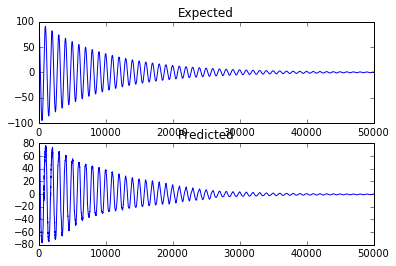

In [36]:
'''Example script showing how to use stateful RNNs
to model long sequences efficiently.
'''

%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 25
# number of elements ahead that are used to make the prediction
lahead = 1


def gen_cosine_amp(amp=100, period=1000, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(2 * np.pi * idx / period)
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos


print('Generating Data')
cos = gen_cosine_amp()
print('Input shape:', cos.shape)

expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)

print('Creating Model')
model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              nb_epoch=1,
              shuffle=False)
    model.reset_states()

print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()